In [1]:
''' 
期末作業進行步驟：
1: read train_set.json
2: 依train_set.json 獲得所有 training data pair(image, target_dict)
3: resize all iamge
4: training
5: test (以此數據進行評分)


提示：
1: model input: resized image in train_set (test_set同樣做法)
2: model output: resized plate_dict['車牌角點'] in train_set (test_set同樣做法)
3: model 不是分類問題，而是regression問題 (與作業 autoEncoder 類似)

'''

import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import time
%matplotlib inline

ROOT_DIR = os.getcwd()

# input path
Dataset_Dir = os.path.join(ROOT_DIR, 'car_dataset')


# read train/test set
name = os.path.join(ROOT_DIR, 'train_set.json')
with open(name, 'r') as file:
    train_files = json.load(file)
    
name = os.path.join(ROOT_DIR, 'test_set.json')
with open(name, 'r') as file:
    test_files = json.load(file)
    
print('train_files:', len(train_files), train_files[0])
print('test_files:', len(test_files), test_files[0])

train_files: 10000 05694
test_files: 2063 00004


In [2]:
# test: read pair: .jpg & .json
def get_pair_info(name):
    f1 = name + '.json'
    with open(f1, 'r') as file:
        jdict = json.load(file)
        
    f2 = name + '.jpg'
    img = cv2.imdecode( np.fromfile(f2, dtype=np.uint8), -1)
    return img, jdict

# 範例
case_file = train_files[0] # 第 1 筆資料
name = os.path.join(Dataset_Dir, case_file)
src_img, plate_dict = get_pair_info(name)

print('src_img:', src_img.shape)
print('plate_dict:', plate_dict)


src_img: (316, 414, 3)
plate_dict: {'車牌號碼': '7422NE', '車牌類型': '白底黑字', '車牌位置': [135, 145, 201, 173], '車牌角點': [137, 145, 201, 146, 201, 173, 135, 172]}


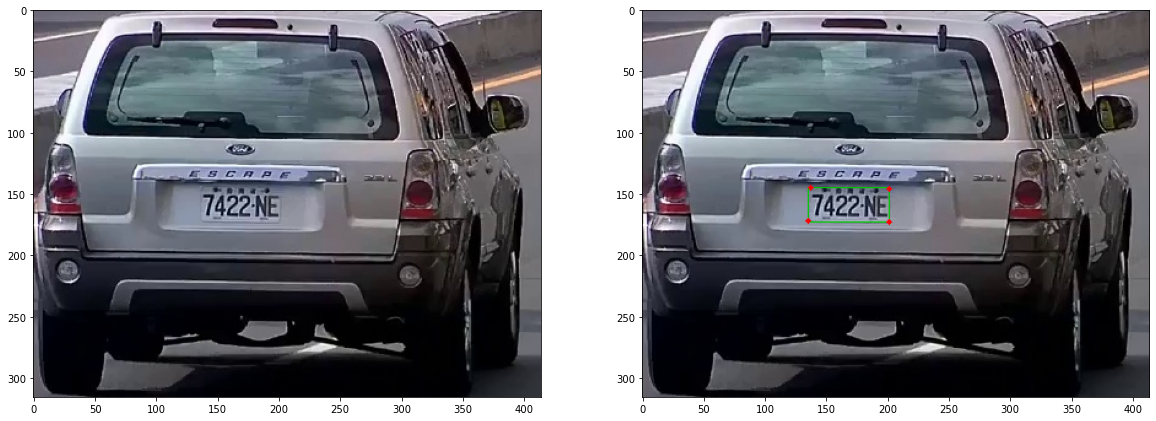

In [3]:
Red_color = (0, 0, 255) # BGR format
Green_color = (0, 200, 0)
radius = 2

draw_img = src_img.copy()
x1,y1, x2,y2 = plate_dict['車牌位置']
px1,py1, px2,py2, px3,py3, px4,py4 = plate_dict['車牌角點']

cv2.rectangle(draw_img, (x1,y1), (x2,y2), Green_color, 1)
cv2.circle(draw_img, (px1,py1),  radius, Red_color, -1)
cv2.circle(draw_img, (px2,py2),  radius, Red_color, -1)
cv2.circle(draw_img, (px3,py3),  radius, Red_color, -1)
cv2.circle(draw_img, (px4,py4),  radius, Red_color, -1)

plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(src_img[:,:,::-1])
plt.subplot(122); plt.imshow(draw_img[:,:,::-1])

src_img: (377, 673, 3)
plate_dict: {'車牌號碼': '2682G', '車牌類型': '白底紅字', '車牌位置': [187, 275, 311, 346], '車牌角點': [195, 275, 311, 285, 305, 346, 187, 331]}


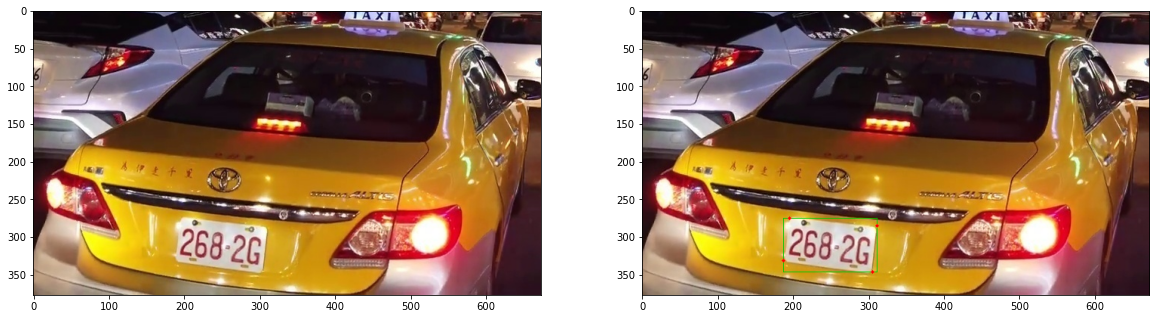

In [4]:
# 範例
case_file = train_files[20] # 第 1 筆資料
name = os.path.join(Dataset_Dir, case_file)
src_img, plate_dict = get_pair_info(name)

print('src_img:', src_img.shape)
print('plate_dict:', plate_dict)

Red_color = (0, 0, 255) # BGR format
Green_color = (0, 200, 0)
radius = 2

draw_img = src_img.copy()
x1,y1, x2,y2 = plate_dict['車牌位置']
px1,py1, px2,py2, px3,py3, px4,py4 = plate_dict['車牌角點']

cv2.rectangle(draw_img, (x1,y1), (x2,y2), Green_color, 1)
cv2.circle(draw_img, (px1,py1),  radius, Red_color, -1)
cv2.circle(draw_img, (px2,py2),  radius, Red_color, -1)
cv2.circle(draw_img, (px3,py3),  radius, Red_color, -1)
cv2.circle(draw_img, (px4,py4),  radius, Red_color, -1)

plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(src_img[:,:,::-1])
plt.subplot(122); plt.imshow(draw_img[:,:,::-1])